Task 3

In [2]:
import numpy as np

In [3]:
X = np.arange(0 , 1.1, 0.1)
t = np.array([0.15, -0.16, -0.61, -0.86, -1.02, -0.44, -.16, 0.05, 0.45, 1.39, 0.86])

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(X)

model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))

In [5]:
history = model.fit(
    X,
    t,
    epochs=1000,
    verbose= 0)

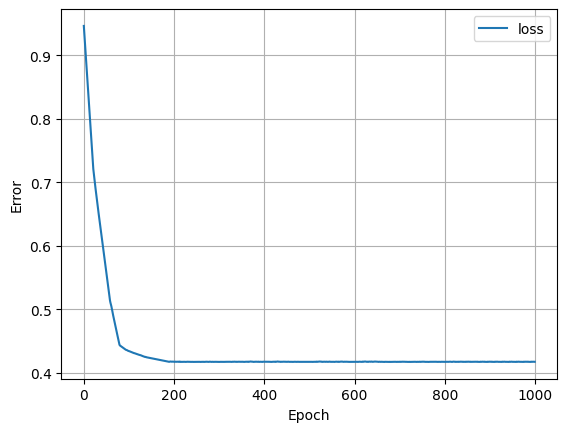

In [6]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  # plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history)


1/1 [==============================] - 0s 255ms/step


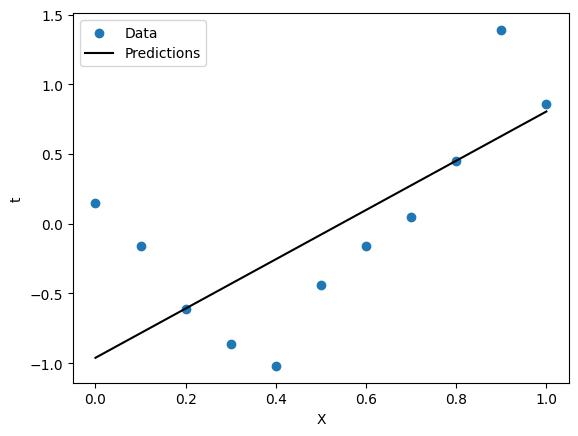

In [7]:
def plot_horsepower(x, y):
  plt.scatter(X, t, label='Data')
  plt.plot(X, y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('t')
  plt.legend()
y = model.predict(X)
plot_horsepower(X, y)

b

In [8]:
import pandas as pd
df = pd.read_csv('faithful.dat', delimiter='\s+', skiprows=25)

In [21]:
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(df["eruptions"])

model_for_the_old = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(10, activation='tanh'),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(1)
  ])

model_for_the_old.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [22]:
history = model_for_the_old.fit(df["eruptions"], df["waiting"], batch_size= 40, epochs = 1000)

Epoch 1/1000
7/7 [==============================] - 2s 718us/step - loss: 70.8790
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 70.8348
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 70.7895
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 70.7429
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 70.6948
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 70.6449
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 70.5933
Epoch 8/1000
7/7 [==============================] - 0s 5ms/step - loss: 70.5398
Epoch 9/1000
7/7 [==============================] - 0s 5ms/step - loss: 70.4843
Epoch 10/1000
7/7 [==============================] - 0s 3ms/step - loss: 70.4269
Epoch 11/1000
7/7 [==============================] - 0s 4ms/step - loss: 70.3674
Epoch 12/1000
7/7 [==============================] - 0s 4ms/step - loss: 70.3058
Epoch 13/1000
7/7 [================

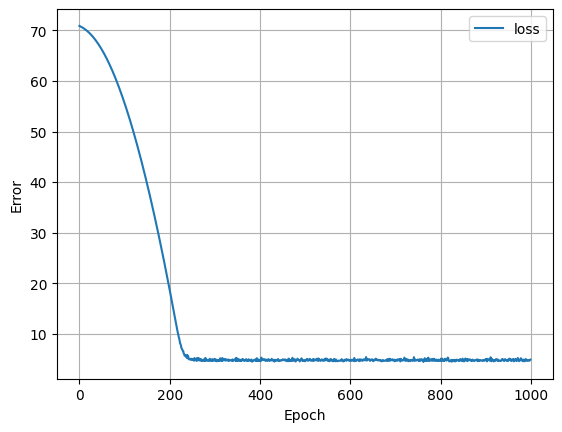

In [23]:
plot_loss(history)

9/9 [==============================] - 0s 4ms/step


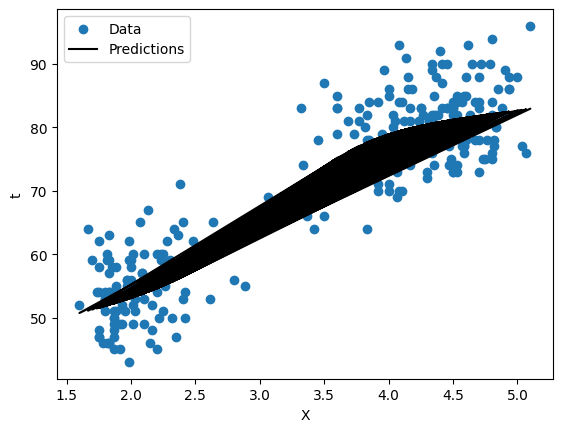

In [27]:
y = model_for_the_old.predict(df["eruptions"])
def plot_horsepower(x, y):
  plt.scatter(df['eruptions'], df['waiting'], label='Data')
  plt.plot(df['eruptions'], y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('t')
  plt.legend()

plot_horsepower(df["eruptions"], y)